Github documentation for V-n Diagram
https://github.com/sobester/ADRpy/blob/master/docs/ADRpy/notebooks/Constructing%20V-n%20diagrams%20in%20ADRpy.ipynb

Construction of V-n diagrams for 'Normal category' aeroplanes (EASA defines these as aeroplanes with a passenger seating configuration of 19 or less and a maximum certified take-off mass of 8,618kg, see CS-23.2005). Specifically, the basis of the discussion below is CS-23 (Certification Specifications for Normal- Category Aeroplanes)

In [123]:
# Include all the require imports
from ADRpy import airworthiness as aw
from ADRpy import unitconversions as co
from ADRpy import atmospheres as at
import math

In [124]:
# CONSTANTS - CONVERSIONS:
KG_TO_LBS = 2.20462262          # 1 kg = 2.2 lbs
KNOTS_TO_FPS = 1.68780986       # 1 knot = 1.69 ft/s
M_TO_FT = 3.2808399             # 1 meter = 3.28 ft

In [125]:
# Define Variables Such as Aerodynamic Characteristics
# NEXT STEPS - LINK TO OHER DOCUMENT VARIABLES

# Geometric Properties:
aspectRatio = 10                            #                           --- UPDATE VALUE ---
wingArea = 2.73                             # Units in meters^2 ,       --- UPDATE VALUE ---
wingArea_imperial = wingArea*(M_TO_FT**2)   # Units in ft^2             

# Weight: 
TOW = 10                    # Units in kg                               --- UPDATE VALUE ---
TOW_newtons = TOW*9.81      # Units in Newtons
TOW_lbs = TOW*2.20462262    # Units in lbs force

# Aerodynamic Perforance Parameters:
CL_max_clean = 1.5          # Max CL at zero-AOA                        --- UPDATE VALUE ---
CL_min_clean =  -1          # Min CL at zero-AOA                        --- UPDATE VALUE ---
CL_slope = 6.3              # Slope of lift coefficient linear curve    --- UPDATE VALUE ---

# Specific Conditions:
altitude = 0                        # Altitude in meters
altitude_ft = altitude / M_TO_FT    # Altitude in ft

# Weight Fraction (Should be less than 1 to account for safety margin)
weight_fraction = 0.85      # Temporary Value                           --- UPDATE VALUE ---

# Dive speed extra safety factor
V_D_Safety_Factor = 1.15                                # 15 % extra factor of safety



In [126]:
designbrief = {}            # Blank dictionary

# Design Definition dictionary (Basic Geom. & Weight in Newtons) 
designdef = {'aspectratio': aspectRatio, 'wingarea_m2': wingArea, 'weight_n': TOW_newtons}

# Design Performance dictionary ()
designperf = {'CLmaxclean': CL_max_clean, 'CLminclean': CL_min_clean, 'CLslope': CL_slope}

# Type of Propulsion System
designpropulsion = "Electric"


# Assume Standard Temperature and pressure (zero-offset ISA)
designatm = at.Atmosphere()


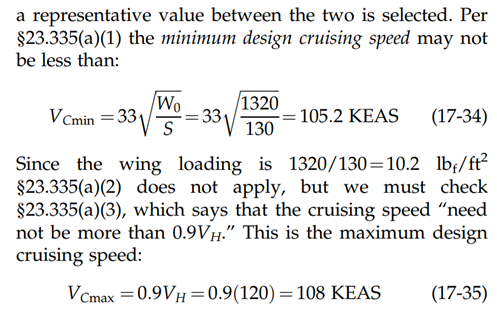
 
V_c: most favourable speed of the aircraft (for example, the speed that maximises its range),
must be chosen quite carefully because airworthiness requirements, such as CS 23.335 establish a series of quite complicated constraints and relationships between V_c, V_D, wing loading and so on.

In [127]:
# Determine Minium Design Cruising Speed:

wingLoading_imperial = TOW_lbs / wingArea_imperial              # lbs/ft^2
V_c_min_KEAS = 33*math.sqrt(wingLoading_imperial)               # KEAS (knots Equivalent AirSpeed)
V_c_min_metric_EAS = V_c_min_KEAS * (KNOTS_TO_FPS / M_TO_FT)    # m/s Equivalent Airspeed



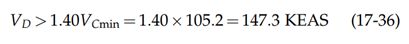

In [128]:
# Determine Dive Speed:
V_D_min_KEAS = 1.4 * V_c_min_KEAS                           # MINIMUM Dive speed in KEAS
V_D_min_EAS = V_D_min_KEAS * (KNOTS_TO_FPS / M_TO_FT )      # MINIMUM Dive Speed in m/s Equivalent Airspeed

# Dive speed with extra factor of safety
V_D_KEAS = V_D_min_KEAS * 1.15                          # 15 % factor of safety to ensure it can go even faster speed in a nose dive
V_D_EAS = V_D_KEAS * (KNOTS_TO_FPS / M_TO_FT )          # Dive speed in m/s EAS 

# Certification Category ('comm' , 'util' , 'aero' , 'norm' ): 
cert_category = 'util'          # Most similar to Utility category compared to the rest


csbrief={   'cruisespeed_keas': V_c_min_KEAS, 
            'divespeed_keas': V_D_KEAS,
            'altitude_m': altitude,
            'weightfraction': weight_fraction, 
            'certcat':  cert_category                         
        }

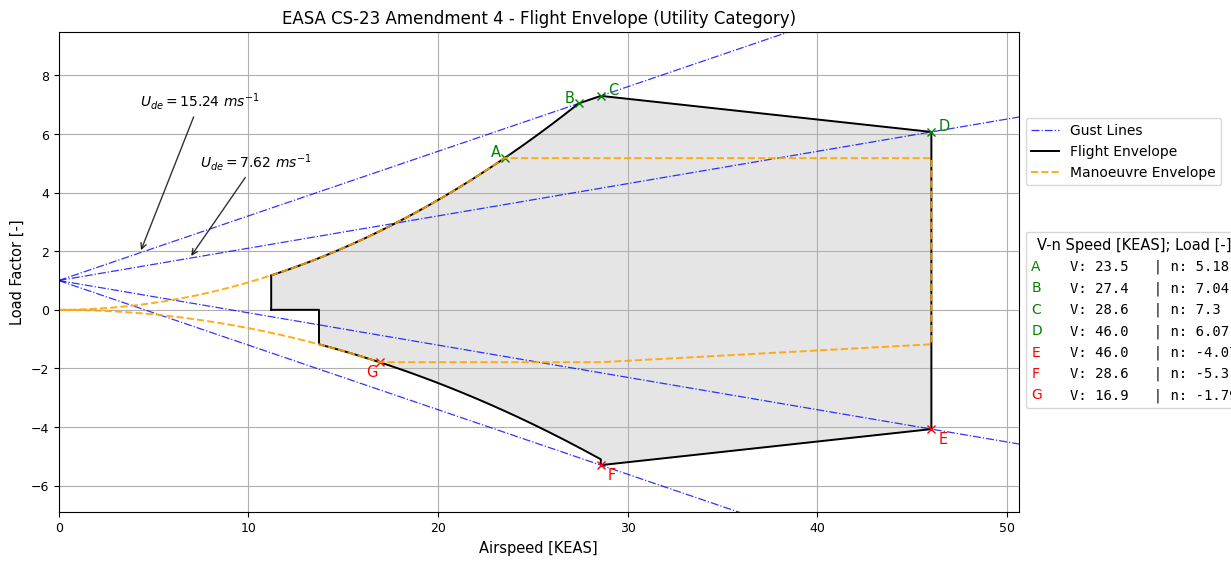

In [129]:
# Implementing the Code:


concept = aw.CertificationSpecifications(designbrief, designdef, designperf, designatm, designpropulsion, csbrief)

# Graphing V-n Diagram
points = concept.flightenvelope(textsize=10, figsize_in=[15, 6], show=True)